## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

* #### Random Choose Method to get optimal *k* and *b*

In [38]:
from sklearn.datasets import load_boston

In [39]:
data = load_boston()

In [40]:
X, Y = data["data"], data["target"]

In [41]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

In [42]:
import matplotlib.pyplot as plt

In [43]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], Y)

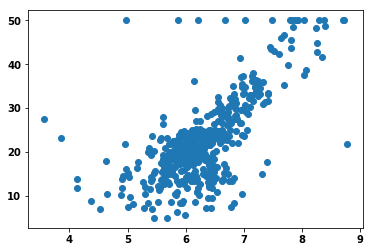

In [44]:
draw_rm_and_price()

### Loss Function

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [45]:
def loss(y, y_hat): # To evaluate the performance
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [46]:
import random

In [47]:
X_rm = X[:, 5]

In [48]:
trying_times = 2000

min_loss = float('inf') #正无穷
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm] #随机得来的y_hat

    current_loss = loss(Y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss

        best_k, best_b = k, b
        print("When time is :{}, get best_k:{} best_b:{}, and loss is:{}".format(i, best_k, best_b, min_loss))

When time is :0, get best_k:-26.60172920738482 best_b:74.7692021209748, and loss is:13884.195308838012
When time is :2, get best_k:-1.9324565437771781 best_b:69.34122108303339, and loss is:1305.1593048157952
When time is :28, get best_k:22.029346915614198 best_b:-94.92001701969994, and loss is:566.6664537375774
When time is :101, get best_k:-6.368180444082 best_b:57.853295611840394, and loss is:183.6184750402474
When time is :160, get best_k:-4.254299153513003 best_b:47.29917331641863, and loss is:135.37651423308986
When time is :291, get best_k:3.4408610632113152 best_b:8.11399388682463, and loss is:111.31400743872335
When time is :315, get best_k:11.039432241508251 best_b:-43.627198076677274, and loss is:55.81036203076843
When time is :690, get best_k:9.013829651423947 best_b:-32.99873246842178, and loss is:44.852270352755745
When time is :1722, get best_k:9.274186597752632 best_b:-35.60235200194508, and loss is:43.6375550106715


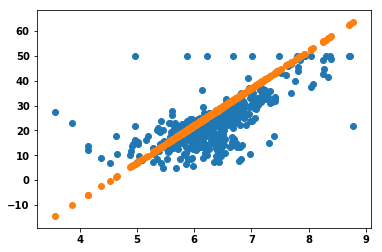

In [49]:
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

* #### Supervised Direction to get optimal *k* and *b*

In [50]:
trying_times = 2000

min_loss = float('inf') #正无穷
best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

# first element: k's change direction, second element: b's change direction
direction = [  # 方向
    (+1, -1),
    (+1, +1),
    (-1, +1),
    (-1, -1)
]

next_direction = random.choice(direction)

scalar = 0.1 # 步长
for i in range(trying_times):
    k_direction, b_direction = next_direction

    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm] #y_hat

    current_loss = loss(Y, price_by_random_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss

        best_k, best_b = current_k, current_b
        next_direction = next_direction
        print("When time is :{}, get best_k:{} best_b:{}, and loss is:{}".format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is :0, get best_k:-63.53809367522688 best_b:62.41747958684903, and loss is:131832.57259274166
When time is :2, get best_k:-63.43809367522688 best_b:62.517479586849035, and loss is:131302.28848988327
When time is :3, get best_k:-63.33809367522688 best_b:62.617479586849036, and loss is:130773.07555889238
When time is :4, get best_k:-63.23809367522688 best_b:62.71747958684904, and loss is:130244.93379976915
When time is :5, get best_k:-63.13809367522688 best_b:62.81747958684904, and loss is:129717.86321251317
When time is :6, get best_k:-63.038093675226875 best_b:62.91747958684904, and loss is:129191.86379712458
When time is :7, get best_k:-62.938093675226874 best_b:63.01747958684904, and loss is:128666.93555360367
When time is :8, get best_k:-62.83809367522687 best_b:63.11747958684904, and loss is:128143.07848195023
When time is :9, get best_k:-62.73809367522687 best_b:63.217479586849045, and loss is:127620.29258216404
When time is :10, get best_k:-62.63809367522687 best_b:63.3

When time is :411, get best_k:-22.5380936752263 best_b:103.41747958684681, and loss is:4228.495648879588
When time is :412, get best_k:-22.4380936752263 best_b:103.5174795868468, and loss is:4137.392011684108
When time is :413, get best_k:-22.338093675226297 best_b:103.6174795868468, and loss is:4047.359546356101
When time is :414, get best_k:-22.238093675226295 best_b:103.71747958684679, and loss is:3958.398252895564
When time is :415, get best_k:-22.138093675226294 best_b:103.81747958684679, and loss is:3870.5081313024957
When time is :416, get best_k:-22.038093675226293 best_b:103.91747958684678, and loss is:3783.6891815768977
When time is :417, get best_k:-21.93809367522629 best_b:104.01747958684678, and loss is:3697.941403718773
When time is :418, get best_k:-21.83809367522629 best_b:104.11747958684677, and loss is:3613.2647977281126
When time is :419, get best_k:-21.73809367522629 best_b:104.21747958684676, and loss is:3529.65936360493
When time is :420, get best_k:-21.6380936752

* #### Gradient Descent to get optimal *k* and *b*

Next Lesson Homework

* #### Try different Loss function and learning rate.

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [54]:
def loss(y, y_hat):
    """a new loss function"""
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [56]:
def learning_function(trying_times, scalar):
    """
    trying_time: 实验次数
    scalar：学习速率
    """
    min_loss = float('inf') #正无穷
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100

    # first element: k's change direction, second element: b's change direction
    direction = [  # 方向
        (+1, -1),
        (+1, +1),
        (-1, +1),
        (-1, -1)
    ]

    next_direction = random.choice(direction)

    for i in range(trying_times):
        k_direction, b_direction = next_direction

        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

        price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm] #y_hat

        current_loss = loss(Y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss

            best_k, best_b = current_k, current_b
            next_direction = next_direction
            print("When time is :{}, get best_k:{} best_b:{}, and loss is:{}".format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)

In [57]:
learning_function(2000, 0.5)

When time is :0, get best_k:20.247584935177855 best_b:80.07635727098216, and loss is:184.7922194913161
When time is :2, get best_k:19.747584935177855 best_b:80.57635727098216, and loss is:182.14990229764012
When time is :3, get best_k:19.247584935177855 best_b:81.07635727098216, and loss is:179.50758510396426
When time is :4, get best_k:18.747584935177855 best_b:81.57635727098216, and loss is:176.86526791028828
When time is :5, get best_k:18.247584935177855 best_b:82.07635727098216, and loss is:174.22295071661253
When time is :6, get best_k:17.747584935177855 best_b:82.57635727098216, and loss is:171.58063352293675
When time is :7, get best_k:17.247584935177855 best_b:83.07635727098216, and loss is:168.93831632926072
When time is :8, get best_k:16.747584935177855 best_b:83.57635727098216, and loss is:166.29599913558462
When time is :9, get best_k:16.247584935177855 best_b:84.07635727098216, and loss is:163.65368194190876
When time is :10, get best_k:15.747584935177855 best_b:84.5763572

In [58]:
learning_function(2000, 0.1)

When time is :0, get best_k:-53.28611932913542 best_b:10.931554669643935, and loss is:346.48502955888176
When time is :2, get best_k:-53.186119329135416 best_b:11.031554669643935, and loss is:345.7565661201464
When time is :3, get best_k:-53.086119329135414 best_b:11.131554669643934, and loss is:345.0281026814111
When time is :4, get best_k:-52.98611932913541 best_b:11.231554669643934, and loss is:344.29963924267605
When time is :5, get best_k:-52.88611932913541 best_b:11.331554669643934, and loss is:343.571175803941
When time is :6, get best_k:-52.78611932913541 best_b:11.431554669643933, and loss is:342.8427123652054
When time is :7, get best_k:-52.68611932913541 best_b:11.531554669643933, and loss is:342.11424892647034
When time is :8, get best_k:-52.58611932913541 best_b:11.631554669643933, and loss is:341.3857854877349
When time is :9, get best_k:-52.486119329135406 best_b:11.731554669643932, and loss is:340.6573220489999
When time is :10, get best_k:-52.386119329135404 best_b:11.

***

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans : 1.构造一个复杂的函数是比较难 2. 数据不断在变化，对于新的数据，给定函数得到的结果一般来说不准确

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 随机的k,b构造的函数所得到的的结果好坏都是随机的，没有优化的方向

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 第二种方法好于第一种方法，缺点：1.多元或者多变量函数，方向组合变的更大更复杂 2.对于min_loss条件不成立时，direction取随机也是无优化方向的

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 待补充。。。

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 待补充。。。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 待补充。。。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 待补充。。。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)